In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['image.cmap'] = 'gray'

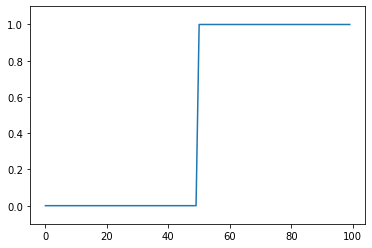

In [2]:
step_signal = np.zeros(100)
step_signal[50:] = 1
fig, ax = plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.1)

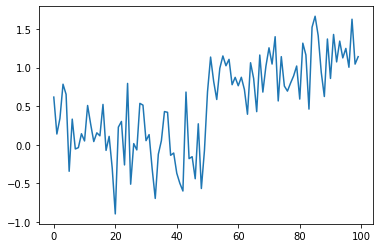

In [3]:
# Just to make sure we all see the same results
np.random.seed(0)


noisy_signal = (step_signal
                + np.random.normal(0, 0.35, step_signal.shape))
fig, ax = plt.subplots()
ax.plot(noisy_signal);

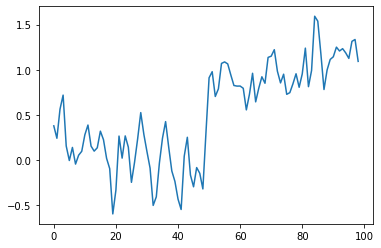

In [4]:
# Take the mean of neighboring pixels
smooth_signal = (noisy_signal[:-1] + noisy_signal[1:]) / 2.0
fig, ax = plt.subplots()
ax.plot(smooth_signal);

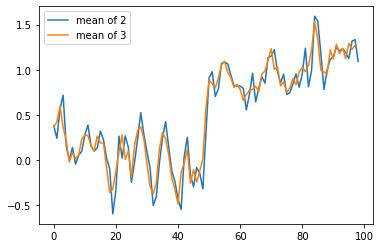

In [5]:

smooth_signal3 = (noisy_signal[:-2] + noisy_signal[1:-1]
                  + noisy_signal[2:]) / 3
fig, ax = plt.subplots()
ax.plot(smooth_signal, label='mean of 2')
ax.plot(smooth_signal3, label='mean of 3')
ax.legend(loc='upper left');

smooth_signal3 and smooth_signal3p are equal: True


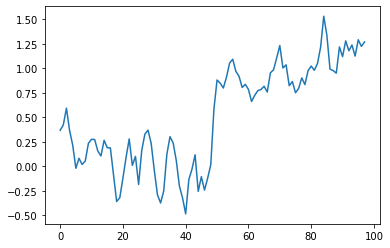

In [6]:
# Same as above, using a convolution kernel
# Neighboring pixels multiplied by 1/3 and summed
mean_kernel3 = np.full((3,), 1/3)
smooth_signal3p = np.convolve(noisy_signal, mean_kernel3,
                              mode='valid')
fig, ax = plt.subplots()
ax.plot(smooth_signal3p)

print('smooth_signal3 and smooth_signal3p are equal:',
      np.allclose(smooth_signal3, smooth_signal3p))

In [7]:
def convolve_demo(signal, kernel):
    ksize = len(kernel)
    convolved = np.correlate(signal, kernel)
    def filter_step(i):
        fig, ax = plt.subplots()
        ax.plot(signal, label='signal')
        ax.plot(convolved[:i+1], label='convolved')
        ax.legend()
        ax.scatter(np.arange(i, i+ksize),
                   signal[i : i+ksize])
        ax.scatter(i, convolved[i])
    return filter_step

from ipywidgets import interact, widgets

i_slider = widgets.IntSlider(min=0, max=len(noisy_signal) - 3,
                             value=0)

interact(convolve_demo(noisy_signal, mean_kernel3),
         i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=97), Output()), _dom_classes=('widget-interact',…

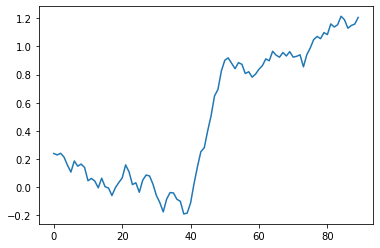

In [8]:
mean_kernel11 = np.full((11,), 1/11)
smooth_signal11 = np.convolve(noisy_signal, mean_kernel11,
                              mode='valid')
fig, ax = plt.subplots()
ax.plot(smooth_signal11);

In [9]:
i_slider = widgets.IntSlider(min=0, max=len(noisy_signal) - 11,
                             value=0)

interact(convolve_demo(noisy_signal, mean_kernel11),
         i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=89), Output()), _dom_classes=('widget-interact',…

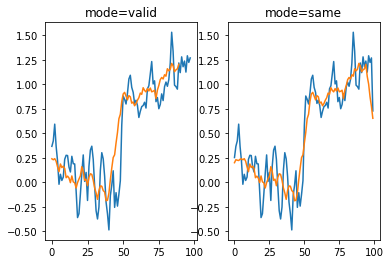

In [10]:
smooth_signal3same = np.convolve(noisy_signal, mean_kernel3,
                                 mode='same')
smooth_signal11same = np.convolve(noisy_signal, mean_kernel11,
                                  mode='same')

fig, ax = plt.subplots(1, 2)
ax[0].plot(smooth_signal3p)
ax[0].plot(smooth_signal11)
ax[0].set_title('mode=valid')
ax[1].plot(smooth_signal3same)
ax[1].plot(smooth_signal11same)
ax[1].set_title('mode=same');

In [11]:
def convolve_demo_same(signal, kernel):
    ksize = len(kernel)
    padded_signal = np.pad(signal, ksize // 2,
                           mode='constant')
    convolved = np.correlate(padded_signal, kernel)
    def filter_step(i):
        fig, ax = plt.subplots()
        x = np.arange(-ksize // 2,
                      len(signal) + ksize // 2)
        ax.plot(signal, label='signal')
        ax.plot(convolved[:i+1], label='convolved')
        ax.legend()
        start, stop = i, i + ksize
        ax.scatter(x[start:stop]+1,
                   padded_signal[start : stop])
        ax.scatter(i, convolved[i])
        ax.set_xlim(-ksize // 2,
                    len(signal) + ksize // 2)
    return filter_step


i_slider = widgets.IntSlider(min=0, max=len(noisy_signal)-1,
                             value=0)

interact(convolve_demo_same(noisy_signal, mean_kernel11),
         i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

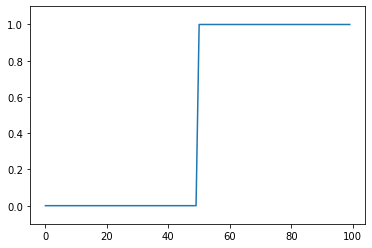

In [12]:
fig, ax = plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.1)

In [13]:
result_corr = np.correlate(step_signal, np.array([-1, 0, 1]),mode='valid')

NameError: name 'result_conv' is not defined

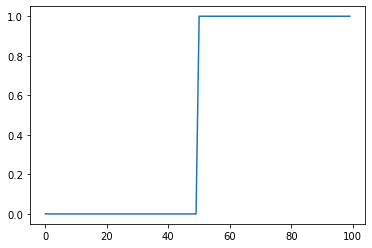

In [14]:
fig, ax = plt.subplots()
ax.plot(step_signal, label='signal')
ax.plot(result_conv, linestyle='dashed', label='convolved')
ax.plot(result_corr, linestyle='dashed', label='correlated',
        color='C3')
ax.legend(loc='upper left')
ax.margins(y=0.1)

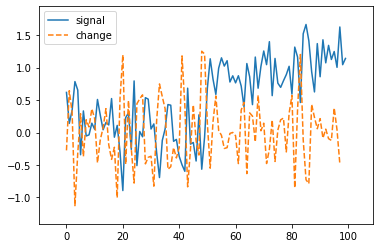

In [15]:
noisy_change = np.correlate(noisy_signal, np.array([-1, 0, 1]))
fig, ax = plt.subplots()
ax.plot(noisy_signal, label='signal')
ax.plot(noisy_change, linestyle='dashed', label='change')
ax.legend(loc='upper left')
ax.margins(0.1)

In [16]:
mean_diff = np.correlate([-1, 0, 1], [1/3, 1/3, 1/3], mode='full')
print(mean_diff)

[-0.33333333 -0.33333333  0.          0.33333333  0.33333333]


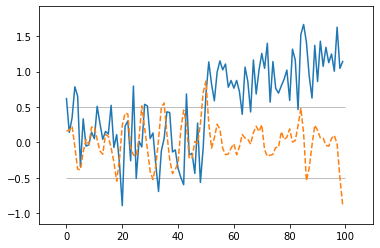

In [17]:
smooth_change = np.correlate(noisy_signal, mean_diff,
                             mode='same')
fig, ax = plt.subplots()
ax.plot(noisy_signal, label='signal')
ax.plot(smooth_change, linestyle='dashed', label='change')
ax.margins(0.1)
ax.hlines([-0.5, 0.5], 0, 100, linewidth=0.5, color='gray');

In [18]:
xi = np.arange(9)
x0 = 9 // 2  # 4
x = xi - x0

In [20]:

import numpy as np

bright_square = np.zeros((7, 7), dtype=float)
bright_square[2:5, 2:5] = 1
print(bright_square)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


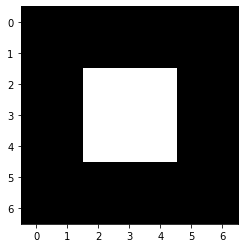

In [21]:
fig, ax = plt.subplots()
ax.imshow(bright_square);

In [22]:
mean_kernel = np.full((3, 3), 1/9)

print(mean_kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [23]:
import scipy.ndimage as ndi

%precision 2
print(bright_square)
print(ndi.correlate(bright_square, mean_kernel))

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.33 0.67 1.   0.67 0.33 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]


In [24]:
#  Convolution Demo
#--------------------------------------------------------------------------
from skimage import color
from scipy import ndimage as ndi
from matplotlib import patches

def mean_filter_demo(image, vmax=1):
    mean_factor = 1.0 / 9.0  # This assumes a 3x3 kernel.
    iter_kernel_and_subimage = iter_kernel(image)

    image_cache = []

    def mean_filter_step(i_step):
        while i_step >= len(image_cache):
            filtered = image if i_step == 0 else image_cache[-1][-1][-1]
            filtered = filtered.copy()

            (i, j), mask, subimage = next(iter_kernel_and_subimage)
            filter_overlay = color.label2rgb(mask, image, bg_label=0,
                                             colors=('cyan', 'red'))
            filtered[i, j] = np.sum(mean_factor * subimage)
            image_cache.append(((i, j), (filter_overlay, filtered)))

        (i, j), images = image_cache[i_step]
        fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
        
        for ax, imc in zip(axes, images):
            ax.imshow(imc, vmax=vmax)
            rect = patches.Rectangle([j - 0.5, i - 0.5], 1, 1, color='yellow', fill=False)
            ax.add_patch(rect)
            
        plt.show()
    return mean_filter_step


def mean_filter_interactive_demo(image):
    from ipywidgets import IntSlider, interact
    mean_filter_step = mean_filter_demo(image)
    step_slider = IntSlider(min=0, max=image.size-1, value=0)
    interact(mean_filter_step, i_step=step_slider)


def iter_kernel(image, size=1):
    """ Yield position, kernel mask, and image for each pixel in the image.

    The kernel mask has a 2 at the center pixel and 1 around it. The actual
    width of the kernel is 2*size + 1.
    """
    width = 2*size + 1
    for (i, j), pixel in iter_pixels(image):
        mask = np.zeros(image.shape, dtype='int16')
        mask[i, j] = 1
        mask = ndi.grey_dilation(mask, size=width)
        #mask[i, j] = 2
        subimage = image[bounded_slice((i, j), image.shape[:2], size=size)]
        yield (i, j), mask, subimage


def iter_pixels(image):
    """ Yield pixel position (row, column) and pixel intensity. """
    height, width = image.shape[:2]
    for i in range(height):
        for j in range(width):
            yield (i, j), image[i, j]


def bounded_slice(center, xy_max, size=1, i_min=0):
    slices = []
    for i, i_max in zip(center, xy_max):
        slices.append(slice(max(i - size, i_min), min(i + size + 1, i_max)))
    return tuple(slices)

In [25]:
mean_filter_interactive_demo(bright_square)
print(np.sum(mean_kernel))

interactive(children=(IntSlider(value=0, description='i_step', max=48), Output()), _dom_classes=('widget-inter…

1.0


In [26]:
from skimage import data

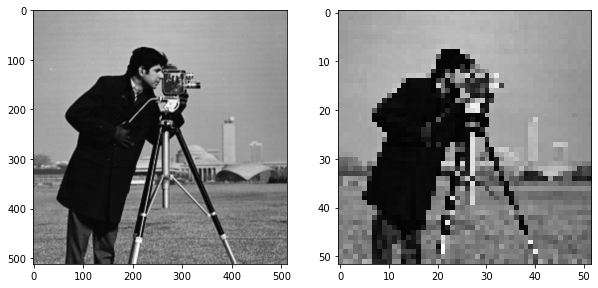

In [27]:
image = data.camera()
pixelated = image[::10, ::10]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image)
ax1.imshow(pixelated) ;

In [28]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title(label)

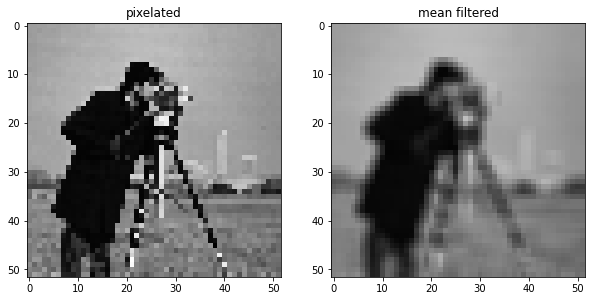

In [29]:
filtered = ndi.correlate(pixelated, mean_kernel)
imshow_all(pixelated, filtered, titles=['pixelated', 'mean filtered'])

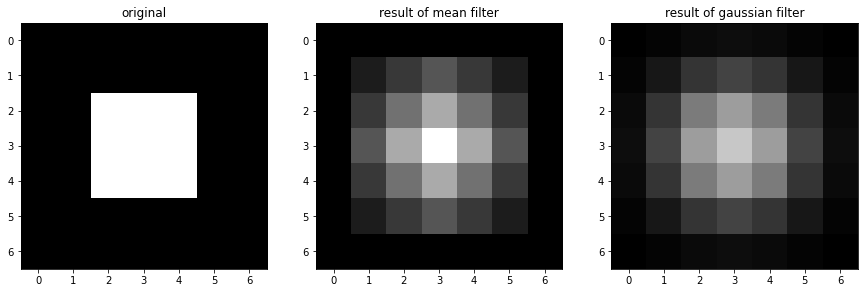

In [30]:
# Rename module so we don't shadow the builtin function
from skimage import filters

smooth_mean = ndi.correlate(bright_square, mean_kernel)
sigma = 1
smooth = filters.gaussian(bright_square, sigma)
imshow_all(bright_square, smooth_mean, smooth,
           titles=['original', 'result of mean filter', 'result of gaussian filter'])

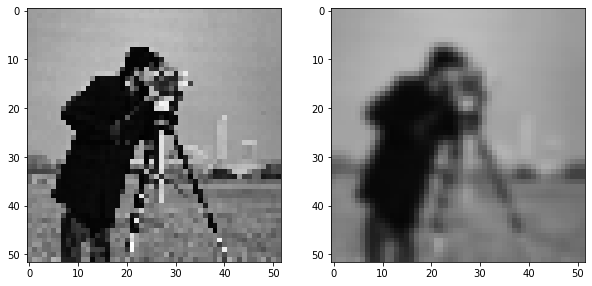

In [31]:
from skimage import img_as_float
# The Gaussian filter returns a float image, regardless of input.
# Cast to float so the images have comparable intensity ranges.
pixelated_float = img_as_float(pixelated)
smooth = filters.gaussian(pixelated_float, sigma=1)
imshow_all(pixelated_float, smooth)

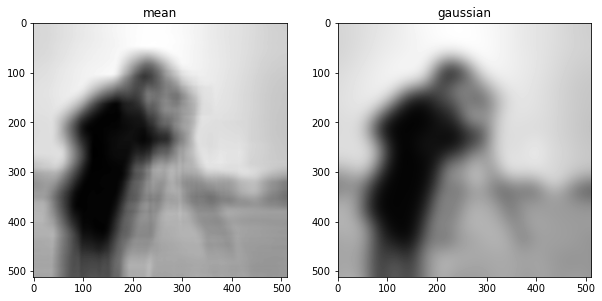

In [32]:
size = 20
structuring_element = np.ones((3*size, 3*size))
smooth_mean = filters.rank.mean(image, structuring_element)
smooth_gaussian = filters.gaussian(image, size)
titles = ['mean', 'gaussian']
imshow_all(smooth_mean, smooth_gaussian, titles=titles)

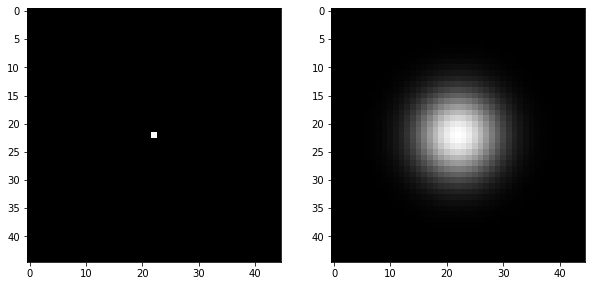

In [33]:
sidelen = 45
sigma = (sidelen - 1) // 2 // 4
spot = np.zeros((sidelen, sidelen), dtype=float)
spot[sidelen // 2, sidelen // 2] = 1
kernel = filters.gaussian(spot, sigma=sigma)

imshow_all(spot, kernel / np.max(kernel))

(44.00, 0.00)

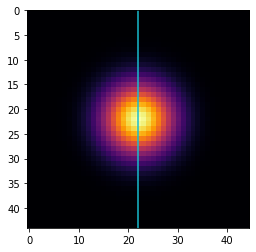

In [34]:
fig, ax = plt.subplots()

ax.imshow(kernel, cmap='inferno')
ax.vlines(22, -100, 100, color='C9')
ax.set_ylim((sidelen - 1, 0))

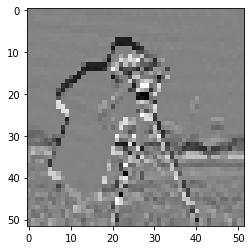

In [35]:
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])

gradient_vertical = ndi.correlate(pixelated.astype(float),
                                  vertical_kernel)
fig, ax = plt.subplots()
ax.imshow(gradient_vertical);